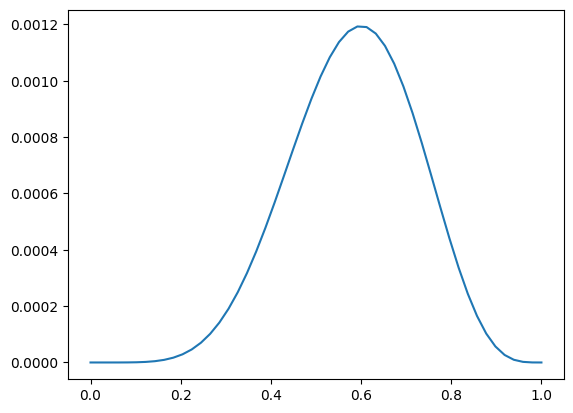

In [2]:
%matplotlib inline
#https://kuleshov-group.github.io/aml-book/contents/lecture9-density-estimation.html
import numpy as np
from matplotlib import pyplot as plt

# our dataset is {H, T, T, H, H, H, H, T,T,H}; if theta = P(x=H), we get:
coin_likelihood = lambda theta: theta*(1-theta)*(1-theta)*theta*theta*theta*theta*(1-theta)*(1-theta)*theta

theta_vals = np.linspace(0,1)
# plot the likedlihood at each theta
plt.plot(theta_vals, coin_likelihood(theta_vals))

Density estimation on pengins dataset

<Axes: ylabel='bill_length_mm'>

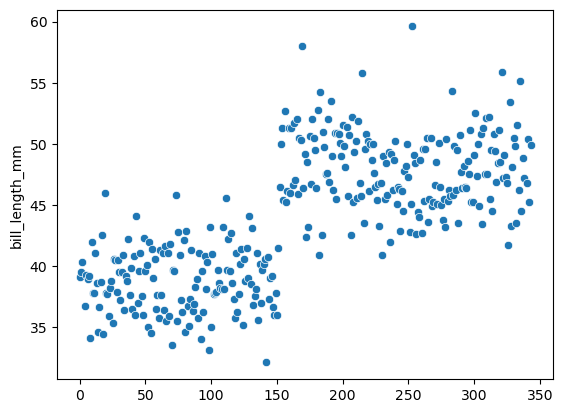

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Select the feature you want to estimate the density for (e.g., bill_length_mm)
feature_to_estimate = "bill_length_mm"
data=penguins[feature_to_estimate]
data = data.dropna()

# Remove rows with infinite values
data = data[~data.isin([np.inf, -np.inf])]
sns.scatterplot(data)


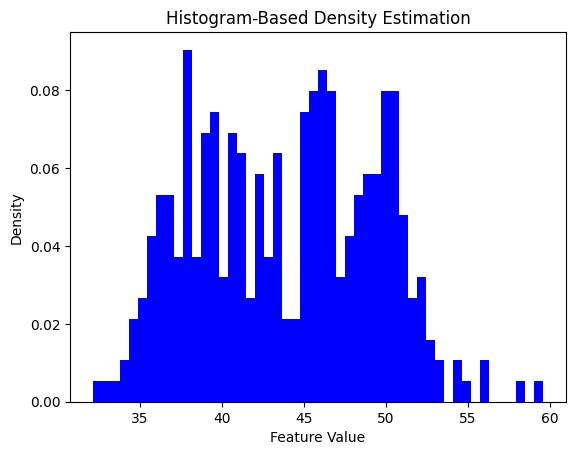

In [6]:
# Create a histogram to estimate density
plt.hist(data, bins=50, density=True, alpha=1, color='blue')  # Adjust the number of bins as needed

# Add labels and a title
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.title("Histogram-Based Density Estimation")

# Show the plot
plt.show()

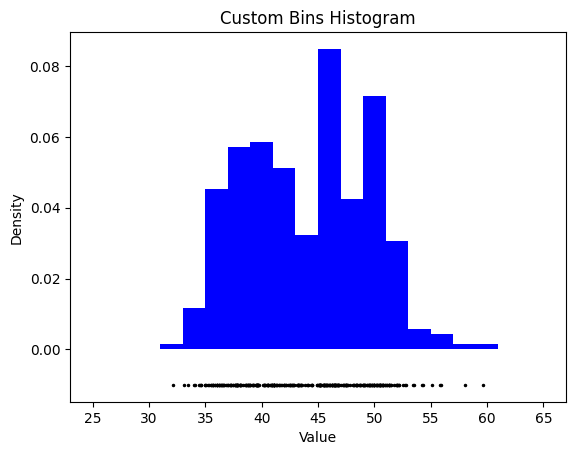

In [7]:

# Define custom bin edges
bin_edges = np.linspace(25, 65, 21)  # Adjust the range and number of bins as needed
plt.plot(data, np.full(len(data), -0.01), '.k', markersize=3)

# Create a histogram with custom bin edges
plt.hist(data, bins=bin_edges, density=True, alpha=1, color='blue')

# Add labels and a title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Custom Bins Histogram")

# Show the plot
plt.show()

Histogram with shifted bins

[26. 28. 30. 32. 34. 36. 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58. 60.
 62. 64. 66.]


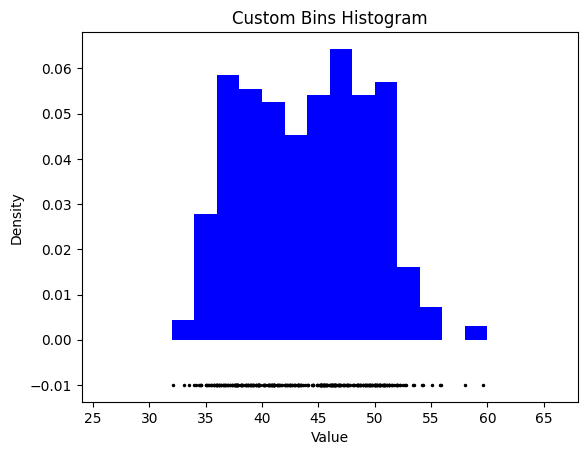

In [8]:
bin_edges = np.linspace(25, 65, 21) + 1


# Create a histogram with custom bin edges
plt.hist(data, bins=bin_edges, density=True, alpha=1, color='blue')
plt.plot(data, np.full(len(data), -0.01), '.k', markersize=3)
print(bin_edges)
# Add labels and a title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Custom Bins Histogram")

# Show the plot
plt.show()

Kernel density estimation with tophat

(1000, 1, 1)


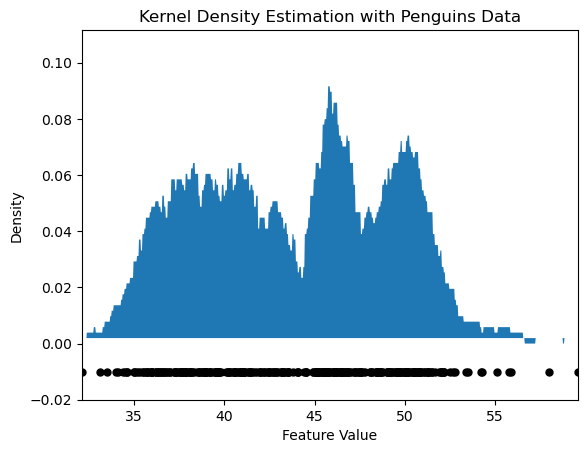

In [3]:
from sklearn.neighbors import KernelDensity

data=penguins[feature_to_estimate]
data = data.dropna()

# Remove rows with infinite values
data = data[~data.isin([np.inf, -np.inf])]
data = data.to_numpy().reshape(-1, 1)
# Create a KernelDensity instance with your desired kernel and bandwidth
kde = KernelDensity(kernel='tophat', bandwidth=0.75)
kde.fit(data)

# Choose 1000 points on the x-axis within the range of your data
x_ticks = np.linspace(min(data), max(data), 1000)[:, np.newaxis]

print(x_ticks.shape)
# Compute the log-density at the specified points
log_density = kde.score_samples(x_ticks.reshape(-1, 1))

# Plot the density estimate
plt.fill(x_ticks[:, 0], np.exp(log_density))

# Plot the penguin data points as black dots
plt.plot(data[:, 0], np.full(data.shape[0], -0.01), '.k', markersize=10)

# Adjust the plot limits to fit your data
plt.xlim(min(data), max(data))
plt.ylim(-0.02, max(np.exp(log_density)) + 0.02)  # Adjust the y-axis limit as needed

# Add labels and a title
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.title("Kernel Density Estimation with Penguins Data")

# Show the plot
plt.show()





(1000, 1, 1)


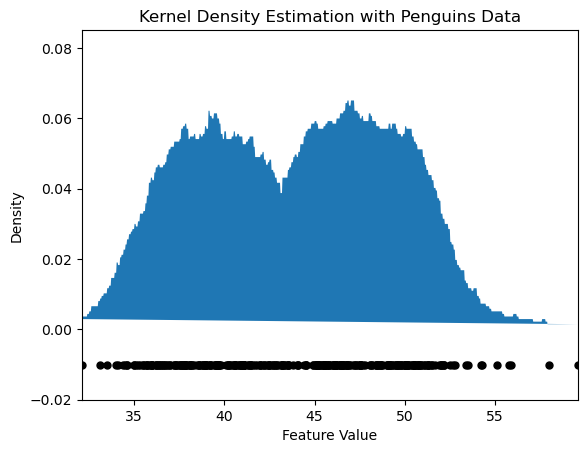

In [4]:
# different bandwidth
kde = KernelDensity(kernel='tophat', bandwidth=2)
kde.fit(data)

# Choose 1000 points on the x-axis within the range of your data
x_ticks = np.linspace(min(data), max(data), 1000)[:, np.newaxis]

print(x_ticks.shape)
# Compute the log-density at the specified points
log_density = kde.score_samples(x_ticks.reshape(-1, 1))

# Plot the density estimate
plt.fill(x_ticks[:, 0], np.exp(log_density))

# Plot the penguin data points as black dots
plt.plot(data[:, 0], np.full(data.shape[0], -0.01), '.k', markersize=10)

# Adjust the plot limits to fit your data
plt.xlim(min(data), max(data))
plt.ylim(-0.02, max(np.exp(log_density)) + 0.02)  # Adjust the y-axis limit as needed

# Add labels and a title
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.title("Kernel Density Estimation with Penguins Data")

# Show the plot
plt.show()

Kernel density estimation with Gaussian

(1000, 1, 1)


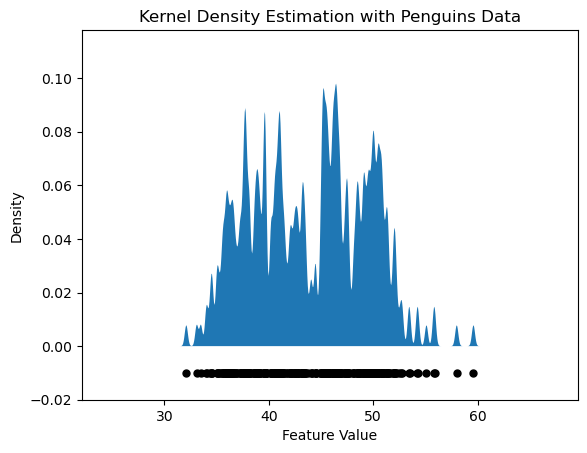

In [16]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.15)
kde.fit(data)

# Choose 1000 points on the x-axis within the range of your data
# Extend x_ticks to allow density to taper off to zero
x_ticks = np.linspace(min(data) - 10, max(data) + 10, 1000)[:, np.newaxis]

print(x_ticks.shape)
# Compute the log-density at the specified points
log_density = kde.score_samples(x_ticks.reshape(-1, 1))

# Plot the density estimate
plt.fill(x_ticks[:, 0], np.exp(log_density))

# Plot the penguin data points as black dots
plt.plot(data[:, 0], np.full(data.shape[0], -0.01), '.k', markersize=10)

# Adjust the plot limits to fit your data
plt.xlim(min(data) - 10, max(data) + 10)
plt.ylim(-0.02, max(np.exp(log_density)) + 0.02)  # Adjust the y-axis limit as needed

# Add labels and a title
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.title("Kernel Density Estimation with Penguins Data")

# Show the plot
plt.show()

Density estimation with synthetic data

In [15]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
import numpy as np
np.random.seed(5)

N = 20 # number of points
# concat samples from two Gaussians:
X = np.concatenate((
    np.random.normal(0, 1, int(0.3 * N)), 
    np.random.normal(5, 1, int(0.7 * N))
))[:, np.newaxis]

# print out X
print(X.flatten())
print(X.shape)

[ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984  1.58248112
  4.0907676   4.40836334  5.18760323  4.67013004  3.80723539  4.79512349
  4.64117105  5.6034716   3.33521147  4.29982096  6.15139101  6.85733101
  3.48882044  5.64484751]
(20, 1)


(-0.02, 0.25)

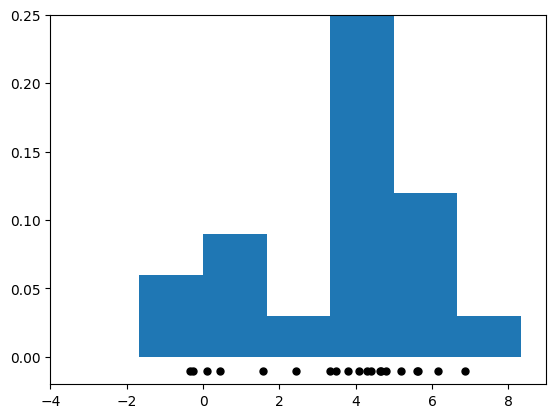

In [16]:
import matplotlib.pyplot as plt

# We set the number of bins to be equal to 10 - 1 = 9 (np.linspace gets us boundaries of the bins)
# Though the figure seems like it has less than 9 bins because some bins do not have any data
bins = np.linspace(-5, 10, 10)
plt.hist(X[:, 0], bins=bins, density=True) # plot the histogram
plt.plot(X[:, 0], np.full(X.shape[0], -0.01), '.k', markersize=10) # plot the points in X
plt.xlim(-4, 9)
plt.ylim(-0.02, 0.25)

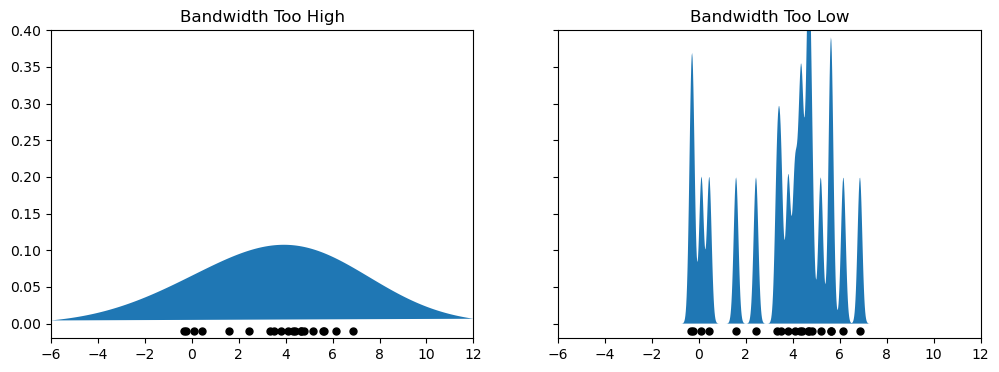

In [24]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
# https://kuleshov-group.github.io/aml-book/contents/lecture9-density-estimation.html
from sklearn.neighbors import KernelDensity

import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity

np.random.seed(5)

N = 20  # number of points
# Concatenate samples from two Gaussians:
X = np.concatenate((
    np.random.normal(0, 1, int(0.3 * N)),
    np.random.normal(5, 1, int(0.7 * N))
))[:, np.newaxis]

# Create a 1D array of points for evaluation
x_ticks = np.linspace(-6, 12, 1000)[:, np.newaxis]
#x_ticks = np.linspace(min(X) - 10, max(X) + 10, 1000)[:, np.newaxis]
kde1 = KernelDensity(kernel='gaussian', bandwidth=3).fit(X)  # fit a KDE model
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X)  # fit a KDE model

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4))
ax[0].fill(x_ticks[:, 0], np.exp(kde1.score_samples(x_ticks)))  # plot the density estimate
ax[1].fill(x_ticks[:, 0], np.exp(kde2.score_samples(x_ticks)))  # plot the density estimate
ax[0].set_title('Bandwidth Too High')
ax[1].set_title('Bandwidth Too Low')

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '.k', markersize=10)  # plot the points in X
    axi.set_xlim(-6, 12)
    axi.set_ylim(-0.02, 0.4)

plt.show()


(-0.02, 0.32)

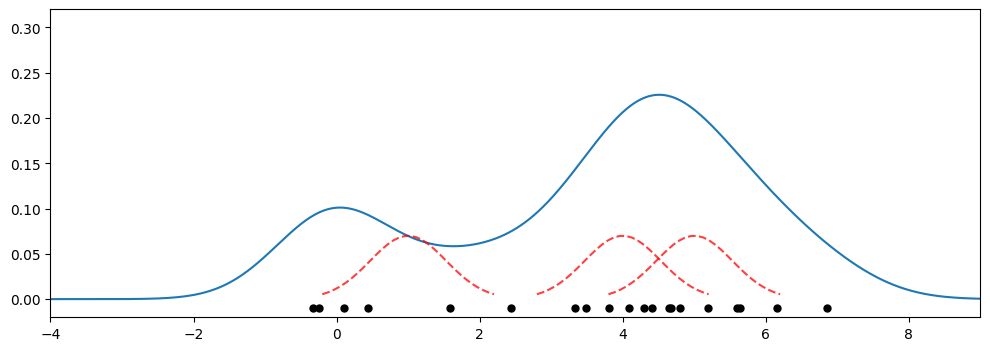

In [18]:
from sklearn.neighbors import KernelDensity
np.random.seed(5)

N = 20  # number of points
# Concatenate samples from two Gaussians:
X = np.concatenate((
    np.random.normal(0, 1, int(0.3 * N)),
    np.random.normal(5, 1, int(0.7 * N))
))[:, np.newaxis]

# Create a 1D array of points for evaluation
x_ticks = np.linspace(-4, 9, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X) # fit a KDE model
x_ticks = np.linspace(-5, 10, 1000)[:, np.newaxis] # choose 1000 points on x-axis
log_density = kde.score_samples(x_ticks) # compute density at 1000 points
gaussian_kernel = lambda z : lambda x: np.exp(-np.abs(x-z)**2/(0.75**2)) # gaussian kernel
kernel_linspace = lambda x : np.linspace(x-1.2,x+1.2,30)

plt.figure(figsize=(12,4))
plt.plot(x_ticks[:, 0], np.exp(log_density)) # plot the density estimate
plt.plot(X[:, 0], np.full(X.shape[0], -0.01), '.k', markersize=10) # plot the points in X as black dots
plt.plot(kernel_linspace(4), 0.07*gaussian_kernel(4)(kernel_linspace(4)), '--', color='r', alpha=0.75)
plt.plot(kernel_linspace(5), 0.07*gaussian_kernel(5)(kernel_linspace(5)), '--', color='r', alpha=0.75)
plt.plot(kernel_linspace(1), 0.07*gaussian_kernel(1)(kernel_linspace(1)), '--', color='r', alpha=0.75)
plt.xlim(-4, 9)
plt.ylim(-0.02, 0.32)

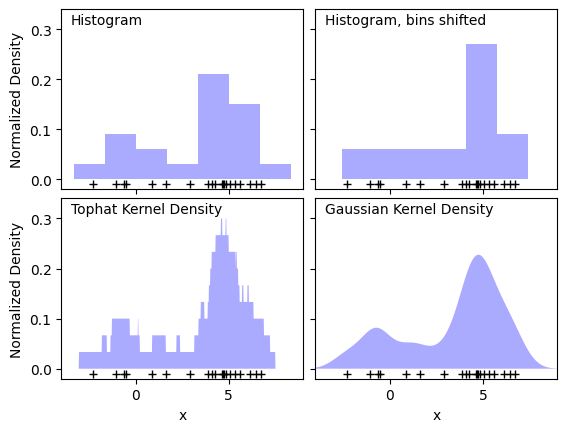

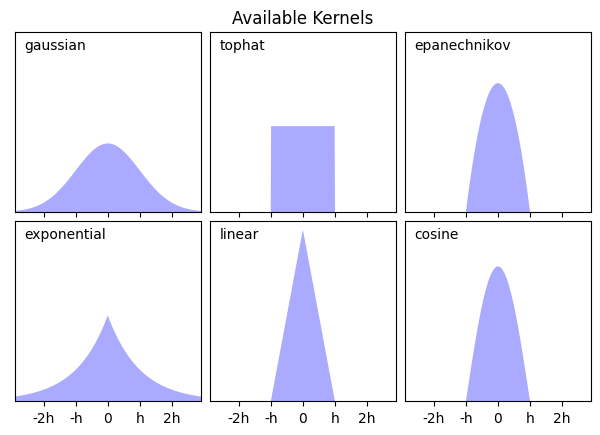

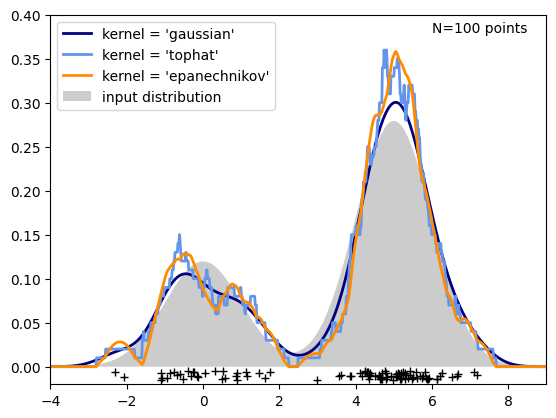

In [19]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

from sklearn.neighbors import KernelDensity

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel("Normalized Density")

for axi in ax[1, :]:
    axi.set_xlabel("x")

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x


for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title("Available Kernels")

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# load the data
digits = load_digits()

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(
            real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(
            new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)

ax[0, 5].set_title("Selection from the input data")
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

In [ ]:
https://scikit-learn.org/stable/auto_examples/neighbors/plot_species_kde.html#sphx-glr-auto-examples-neighbors-plot-species-kde-py

In [ ]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap

    basemap = True
except ImportError:
    basemap = False


def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)


# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ["Bradypus Variegatus", "Microryzomys Minutus"]

Xtrain = np.vstack([data["train"]["dd lat"], data["train"]["dd long"]]).T
ytrain = np.array(
    [d.decode("ascii").startswith("micro") for d in data["train"]["species"]],
    dtype="int",
)
Xtrain *= np.pi / 180.0  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.0


# Plot map of South America with distributions of each species
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)



plt.subplot(1, 3,1)
if basemap:
    print(" - plot coastlines using basemap")
    m = Basemap(
            projection="cyl",
            llcrnrlat=Y.min(),
            urcrnrlat=Y.max(),
            llcrnrlon=X.min(),
            urcrnrlon=X.max(),
            resolution="c",
    )
    m.drawcoastlines()
    m.drawcountries()
else:
    print(" - plot coastlines from coverage")
    plt.contour(
        X, Y, land_reference, levels=[-9998], colors="k", linestyles="solid"
    )
    plt.xticks([])
    plt.yticks([])
    

for i in range(2):
    print(i)
    plt.scatter(
        Xtrain[ytrain == i][:, 1] * 180.0 / np.pi,  # Convert back to degrees
        Xtrain[ytrain == i][:, 0] * 180.0 / np.pi,  # Convert back to degrees
        s=10,
        label=species_names[i],
    )

plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude (degrees)")
plt.title("Distribution of Species")
plt.legend()
plt.grid(True)

for i in range(2):
    plt.subplot(1, 3, i + 2)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(
        bandwidth=0.04, metric="haversine", kernel="gaussian", algorithm="ball_tree"
    )
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype="int")
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(
            projection="cyl",
            llcrnrlat=Y.min(),
            urcrnrlat=Y.max(),
            llcrnrlon=X.min(),
            urcrnrlon=X.max(),
            resolution="c",
        )
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(
            X, Y, land_reference, levels=[-9998], colors="k", linestyles="solid"
        )
        plt.xticks([])
        plt.yticks([])
    
    

    plt.xlabel("Longitude (degrees)")
    plt.ylabel("Latitude (degrees)")

    
    plt.grid(True)

plt.tight_layout()
plt.show()